In [7]:
import matplotlib.pyplot as plt
import pandas as pd

## 2.1 SAC (Sistema de Amortização Constante)

No SAC, a amortização do capital é constante ao longo do tempo, enquanto os juros diminuem conforme a dívida é paga. Como resultado, as parcelas iniciais são mais altas e vão reduzindo ao longo do tempo.

In [8]:
def amortization(
        p: float,
        n: int
):
    """
    Calcula a amortização de um empréstimo.

    - Args:
      - p: float: Valor do empréstimo.
      - n: int: Número de parcelas.
    """

    return p/n


def fees(
        s: float,
        i: float,
):
    """
    Calcula os juros de um empréstimo.

    - Args:
      - s: float: Saldo devedor.
      - i: float: Taxa de juros.

    """

    return s * i


def installment(
    a: float,
    j: float
):
    """
    Calcula o valor da parcela de um empréstimo.

    - Args:
      - a: float: Amortização.
      - j: float: Juros.

    """

    return a + j

## 2.2 Sistema Price (Parcelas Iguais com Juros)

No Sistema Price, o valor das parcelas é fixo ao longo do tempo. Inicialmente, a maior parte da parcela corresponde aos juros, enquanto a amortização aumenta com o tempo.

In [9]:
def price(
        p: float,
        n: int,
        i: float
):
    """
    Calcula o preço de um empréstimo.

    - Args:
      - p: float: Valor do empréstimo.
      - n: int: Número de parcelas.
      - i: float: Taxa de juros.

    """

    return p * i / (1 - (1 + i) ** -n
)

# Exemplo 1: SAC

Considere um empréstimo de R$ 10.000,00 a uma taxa de juros de 1% ao mês, pago em 5 meses.

Mês 1: Amortização = 2000.00, Juros = 100.00, Parcela = 2100.00, Saldo Devedor = 8000.00
Mês 2: Amortização = 2000.00, Juros = 80.00, Parcela = 2080.00, Saldo Devedor = 6000.00
Mês 3: Amortização = 2000.00, Juros = 60.00, Parcela = 2060.00, Saldo Devedor = 4000.00
Mês 4: Amortização = 2000.00, Juros = 40.00, Parcela = 2040.00, Saldo Devedor = 2000.00
Mês 5: Amortização = 2000.00, Juros = 20.00, Parcela = 2020.00, Saldo Devedor = 0.00


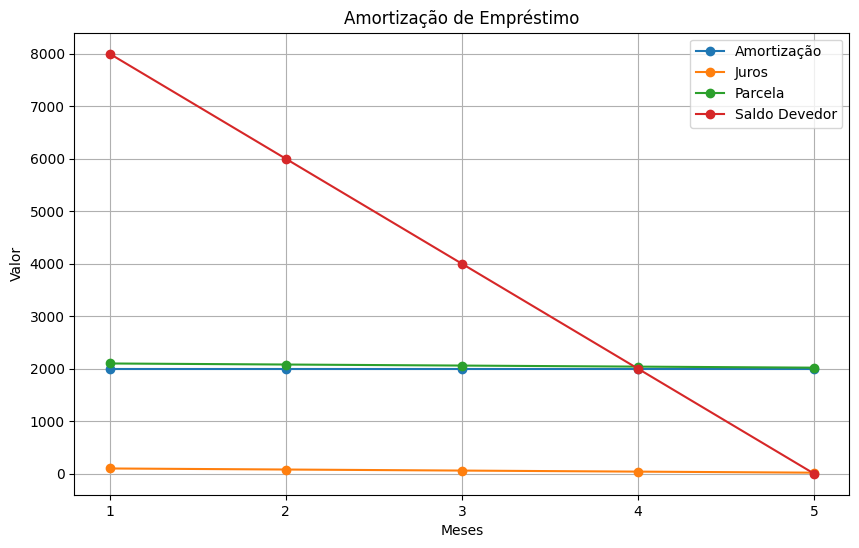

   Mês  Amortização  Juros  Parcela  Saldo Devedor
0    1       2000.0  100.0   2100.0         8000.0
1    2       2000.0   80.0   2080.0         6000.0
2    3       2000.0   60.0   2060.0         4000.0
3    4       2000.0   40.0   2040.0         2000.0
4    5       2000.0   20.0   2020.0            0.0


In [ ]:
p = 10000  # Valor do empréstimo
n = 5      # Número de parcelas
i = 0.01   # Taxa de juros (1% ao mês)

# Amortização fixa
a = amortization(p, n)

results = []

# Cálculos para cada mês
saldo_devedor = p
for mes in range(1, n + 1):
    j = fees(saldo_devedor, i)  # Juros do período
    parcela = installment(a, j)  # Parcela do período
    saldo_devedor -= a  # Atualiza o saldo devedor
    results.append((mes, a, j, parcela, saldo_devedor))
    print(f"Mês {mes}: Amortização = {a:.2f}, Juros = {j:.2f}, Parcela = {parcela:.2f}, Saldo Devedor = {saldo_devedor:.2f}")


# Cria um DataFrame para os resultados
df = pd.DataFrame(results, columns=["Mês", "Amortização", "Juros", "Parcela", "Saldo Devedor"])
# Plota os resultados
plt.figure(figsize=(10, 6))
plt.plot(df["Mês"], df["Amortização"], label="Amortização", marker='o')
plt.plot(df["Mês"], df["Juros"], label="Juros", marker='o')
plt.plot(df["Mês"], df["Parcela"], label="Parcela", marker='o')
plt.plot(df["Mês"], df["Saldo Devedor"], label="Saldo Devedor", marker='o')
plt.title("Amortização de Empréstimo")
plt.xlabel("Meses")
plt.ylabel("Valor")
plt.xticks(df["Mês"])
plt.legend()
plt.grid()
plt.show()
# Exibe o DataFrame
print(df)

## **Fórmula da parcela fixa:**

Para o mesmo empréstimo de R$ 10.000,00 a 1% ao mês em 5 meses:

Cálculo da parcela fixa:

$$
P = \frac{10000 \times 0.01}{1 - (1 + 0.01)^{-5}} \approx 2.121,33
$$